### 차트 작성 시 한글 깨짐 방지를 위한 koreanize-matplotlib 설치

In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 85.4 MB/s eta 0:00:00


### 라이브러리 import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 로드 및 분할

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

In [4]:
# Feature(X)와 Target(y) 분리
X = df.drop('target', axis=1)
y = df['target']

# 학습용/테스트용 데이터 분할 (8:2)
# stratify=y: 타겟 클래스 비율 유지 (강의자료 강조 사항)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

학습 데이터: (455, 30)
테스트 데이터: (114, 30)


### 2. 모델 학습(DecisionTree)

In [5]:
# max_depth=4: 트리의 최대 깊이 제한 (과적합 방지)
# min_samples_leaf=10: 리프 노드가 되기 위한 최소 샘플 수
dt_clf = DecisionTreeClassifier(
    criterion='gini',       # 분할 기준: 지니 지수 (Page 4)
    max_depth=4,            # 사전 가지치기: 최대 깊이
    min_samples_leaf=10,    # 사전 가지치기: 리프 노드 최소 샘플
    random_state=42
)

# 모델 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

### 3. Tree 시각화

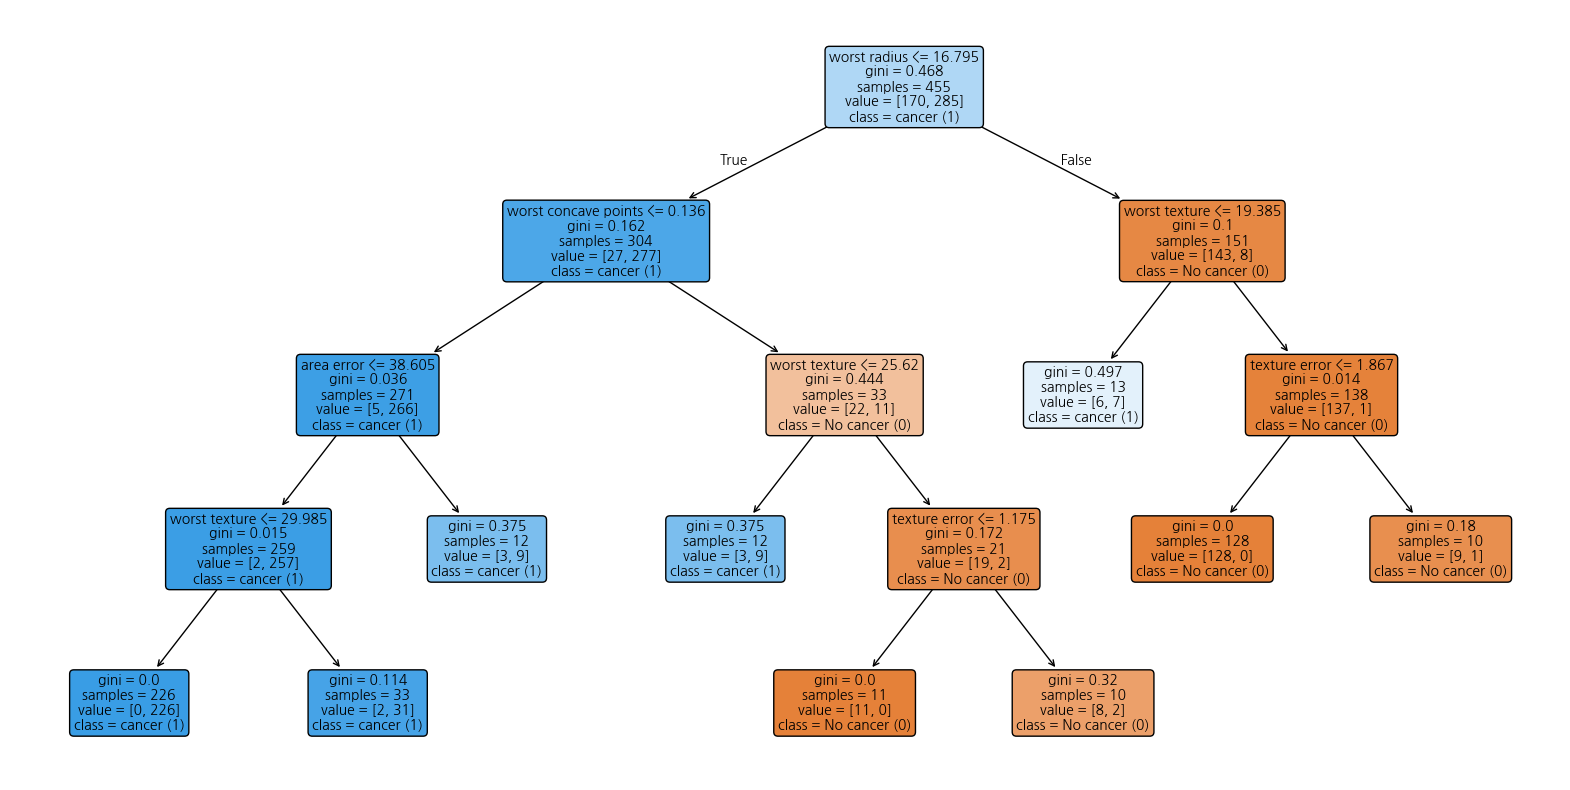

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    feature_names=X.columns,
    class_names=['No cancer (0)', 'cancer (1)'],
    filled=True,        # 노드 색칠 (불순도에 따라 색상 진하기 변경)
    rounded=True,       # 노드 모서리 둥글게
    fontsize=10
)
plt.show()

### 4. 모델 성능 평가

In [8]:
# 테스트 데이터 예측
y_pred = dt_clf.predict(X_test)

# 정확도(Accuracy) 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (정확도): {accuracy:.4f}")

# 상세 리포트 출력 (Precision, Recall, F1-score)
print("\n[Classification Report]")
print(classification_report(y_test, y_pred, target_names=['No cancer (0)', 'cancer (1)']))

Accuracy (정확도): 0.9474

[Classification Report]
               precision    recall  f1-score   support

No cancer (0)       0.93      0.93      0.93        42
   cancer (1)       0.96      0.96      0.96        72

     accuracy                           0.95       114
    macro avg       0.94      0.94      0.94       114
 weighted avg       0.95      0.95      0.95       114



In [9]:
# Feature Importance 확인
for name, value in zip(X.columns, dt_clf.feature_importances_):
    print(f"{name}: {value:.4f}")

mean radius: 0.0000
mean texture: 0.0000
mean perimeter: 0.0000
mean area: 0.0000
mean smoothness: 0.0000
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: 0.0000
mean symmetry: 0.0000
mean fractal dimension: 0.0000
radius error: 0.0000
texture error: 0.0032
perimeter error: 0.0000
area error: 0.0071
smoothness error: 0.0000
compactness error: 0.0000
concavity error: 0.0000
concave points error: 0.0000
symmetry error: 0.0000
fractal dimension error: 0.0000
worst radius: 0.7874
worst texture: 0.0713
worst perimeter: 0.0000
worst area: 0.0000
worst smoothness: 0.0000
worst compactness: 0.0000
worst concavity: 0.0000
worst concave points: 0.1310
worst symmetry: 0.0000
worst fractal dimension: 0.0000


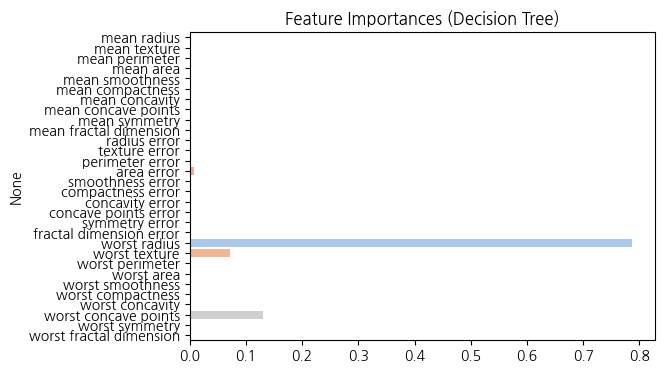

In [10]:
# 특성 중요도 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=dt_clf.feature_importances_, y=X.columns, palette='pastel')
plt.title('Feature Importances (Decision Tree)')
plt.show()